=== Runtime (minutes) ===
Mean: 22.2 | Median: 21.9 | 5–95%: 17.1 to 28.3

=== Charging time (hours, +30% losses) ===
Mean: 110.3 | Median: 43.9 | 5–95%: 23.2 to 266.7


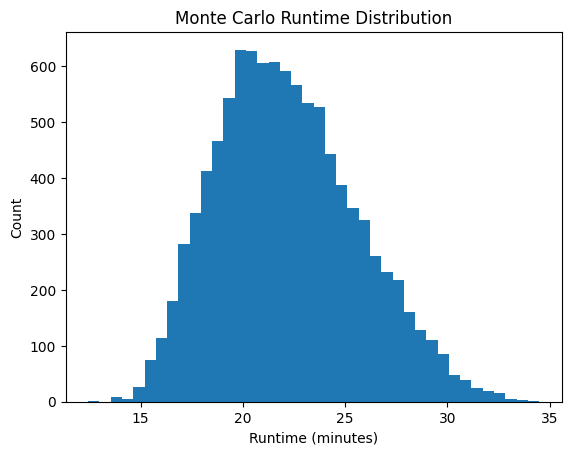

In [2]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

 # ===== Fixed design specs =====
V_batt = 11.1          # V (3S battery nominal)
Ah_batt = 5.8          # Ah
Wh_batt_nom = V_batt * Ah_batt   # 64.38 Wh

P_load_nom = 150.0     # W motor/load power (assumed average)
eta_nom = 0.85         # converter efficiency
P_solar_nom = 1.92     # W (3 panels x 0.64W)

 # ===== Uncertainty assumptions =====
N = 10000
Ah = Ah_batt * (1 + np.random.uniform(-0.15, 0.15, N))             # battery capacity ±15%
eta = np.clip(np.random.normal(eta_nom, 0.05, N), 0.60, 0.98)      # efficiency ±0.05
P_load = P_load_nom * (1 + np.random.uniform(-0.20, 0.20, N))      # load ±20%
P_solar = np.clip(np.random.normal(P_solar_nom, 0.50*P_solar_nom, N), 0.05, None)  # solar ±50%

Wh = V_batt * Ah

 # ===== Outputs =====
runtime_min = (Wh * eta / P_load) * 60                    # minutes
charge_h = (Wh / P_solar) * 1.30                          # +30% losses
charge_h = np.clip(charge_h, 0, 1e6)

  
def stats(x):
    return (np.mean(x), np.percentile(x, 5), np.percentile(x, 50), np.percentile(x, 95))

rt_mean, rt_p5, rt_med, rt_p95 = stats(runtime_min)
ch_mean, ch_p5, ch_med, ch_p95 = stats(charge_h)

print("=== Runtime (minutes) ===")
print(f"Mean: {rt_mean:.1f} | Median: {rt_med:.1f} | 5–95%: {rt_p5:.1f} to {rt_p95:.1f}")

print("\n=== Charging time (hours, +30% losses) ===")
print(f"Mean: {ch_mean:.1f} | Median: {ch_med:.1f} | 5–95%: {ch_p5:.1f} to {ch_p95:.1f}")

 # ===== Plots (paper-quality simple) =====
plt.figure()
plt.hist(runtime_min, bins=40)
plt.xlabel("Runtime (minutes)")
plt.ylabel("Count")
plt.title("Monte Carlo Runtime Distribution")
plt.show()

# plt.figure()
# plt.hist(charge_h, bins=40)
# plt.xlabel("Charging time (hours)")
# plt.ylabel("Count")
# plt.title("Monte Carlo Charging Time Distribution (+30pct losses)")
# plt.show()

